<a href="https://colab.research.google.com/github/Nasar1418/Machine-Learning/blob/main/Colab%20files-2/Project_5_Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
# Loading Dataset
loan_data =pd.read_csv("/content/drive/MyDrive/Datasets/loan_dataset.csv")

In [4]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan_data.shape

(614, 13)

In [6]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
loan_data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [8]:
# Dropping missing values
loan_dataset = loan_data.dropna()

In [9]:
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [10]:
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [11]:
loan_dataset=loan_dataset.replace(to_replace='3+',value=4)

In [12]:
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


<Axes: xlabel='Education', ylabel='count'>

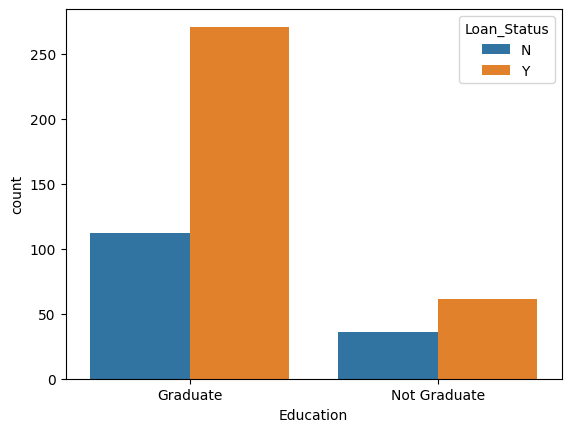

In [13]:
# Data Visualization
sns.countplot(data=loan_dataset,x='Education', hue='Loan_Status')

<Axes: xlabel='Married', ylabel='count'>

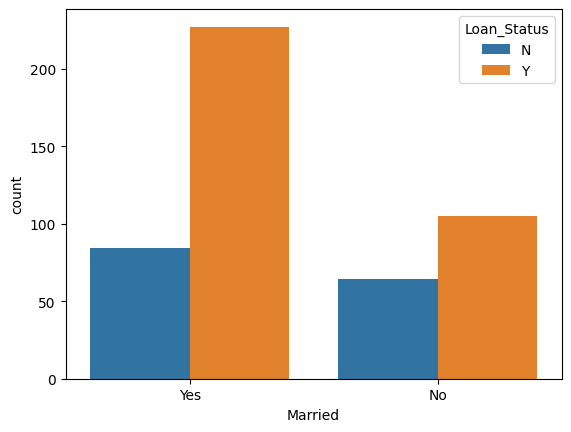

In [14]:
sns.countplot(data=loan_dataset, x='Married', hue='Loan_Status')

In [15]:
# Convert Categorical Columns to numerical Values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0},'Loan_Status':{'N':0,'Y':1}},inplace=True)

<ipython-input-15-a0e9a7672f83>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0},'Loan_Status':{'N':0,'Y':1}},inplace=True)


In [16]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [18]:
# Separating the data and label
x=loan_dataset.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
y=loan_dataset['Loan_Status']

In [19]:
print(x)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, stratify=y, random_state=2)

In [21]:
print(x.shape, x_train.shape, x_test.shape)

(480, 11) (432, 11) (48, 11)


In [22]:
classifier= svm.SVC(kernel='linear')

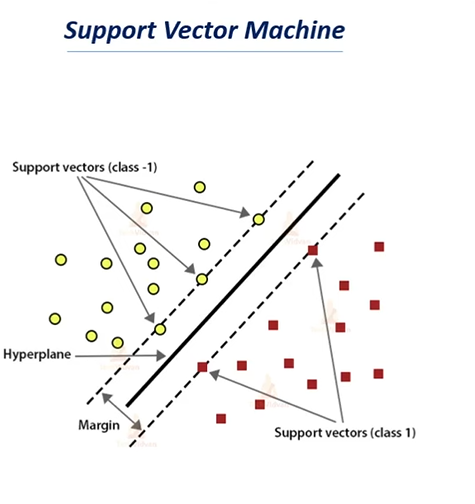

In [23]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [24]:
# Accuracy
x_train_prediction =classifier.predict(x_train)
x_train_accuracy= accuracy_score(x_train_prediction, y_train)

In [29]:
print(x_train_accuracy)

0.7986111111111112


In [30]:
# Model Evaluation
x_test_prediciton = classifier.predict(x_test)
x_test_accuracy = accuracy_score(x_test_prediciton, y_test)

In [39]:
print(x_test_accuracy)

0.8333333333333334


In [41]:
# Predictive System
input_data = (1,1,2,1,0,4583,1508.0,128.0,360.0,1.0,0)
input_arr=np.asarray(input_data)
input_reshaped=input_arr.reshape(1,-1)

prediciton=classifier.predict(input_reshaped)
print(prediciton)

if (prediciton[0]==0):
  print('Loan will not be approved')
else:
  print('Loan will be approved')

[1]
Loan will be approved


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
